# Assignment 4 - Evaluation

In this assignment you will train several models and evaluate how effectively they predict instances of fraud using data based on credit card fraud.
 
Each row in `fraud_data.csv` corresponds to a credit card transaction. Features include confidential variables `V1` through `V28` as well as `Amount` which is the amount of the transaction. 
 
The target is stored in the `class` column, where a value of 1 corresponds to an instance of fraud and 0 corresponds to an instance of not fraud.

In [62]:
#import individual packages:
import pandas as pd
import numpy as np
import sklearn
from sklearn import (cluster,
                     datasets,
                     decomposition,
                     discriminant_analysis,
                     dummy,
                     ensemble,
                     feature_selection as ftr_sel,
                     linear_model,
                     metrics,
                     model_selection as skms,
                     multiclass as skmulti,
                     naive_bayes,
                     neighbors,
                     pipeline,
                     preprocessing as skpre,
                     svm,
                     tree)
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#OR:
from mlwpy import *

### Question 1
Import the data from `fraud_data.csv`. What percentage of the observations in the dataset are instances of fraud?

*There can be many different ways to solve this problem. Choose the one you feel comfy about.* 

In [26]:
#type your code here:
fraud = pd.read_csv("fraud_data.csv")
np.unique(fraud["Class"],return_counts=True)
fraud_perc = 492/(284315 + 492)
print("The percentage of the fraud observations in the dataset is ", round(fraud_perc*100,2),"%.")

The percentage of the fraud observations in the dataset is  0.17 %.


In [38]:
fraud

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


### Question 2

Using `X_train`, `X_test`, `y_train`, and `y_test` (do train test split in step 1), train a dummy classifier that classifies everything as the majority class of the training data. What is the accuracy of this classifier? What is the recall? Interpret recall.

In [50]:
# Step 1: Use X_train, X_test, y_train, y_test for all of the following questions
#Write your code here:
X = fraud.iloc[0:284806,1:30]
y = fraud.iloc[0:284806,30]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

In [52]:
#Step 2: model evaluation
#write your code here:
baseline = dummy.DummyClassifier(strategy="most_frequent")
baseline.fit(X_train, y_train)
base_preds = baseline.predict(X_test)
base_acc = metrics.accuracy_score(base_preds, y_test)
print("The accuracy of this classifier is ",base_acc*100,"%.")

The accuracy of this classifier is  99.8121554720691 %.


confusion matrix:
[[56855   107]
 [    0     0]]
The recall is  99.8121554720691 %.  This indicates that the model correctly classifies incidences of Class 0, non-fraud,  99.81 % of the time. The accuracy is the same as the recall.


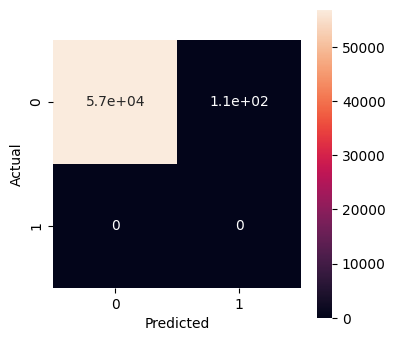

In [60]:
#interpretation of recall:
cm = metrics.confusion_matrix(base_preds, y_test)
print("confusion matrix:", cm, sep="\n")
fig, ax = plt.subplots(1,1,figsize=(4,4))
ax = sns.heatmap(cm, annot=True, square=True)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual');
recall = 56855/(56855+107)
print("The recall is ",recall*100,"%. ", "This indicates that the model correctly classifies incidences of Class 0, non-fraud, ", round(recall*100,2), "% of the time. The accuracy is the same as the recall.") 

### Question 3

(a) Using X_train, X_test, y_train, y_test (as defined above), train a Naive Bayes classifer using the default parameters. Create confusion matrix (visualized in both table and heatmap), classification report and ROC curve as shown in this week's code book. 
<br> (b) Write a paragraph to interpret your results based on the materials covered in class and demonstrate the real consequence of making errors.

In [65]:
#confusion matrix (table)
# write our code here:
gnb = GaussianNB()
gnb_y_pred = gnb.fit(X_train, y_train).predict(X_test)
gnb_cm = metrics.confusion_matrix(gnb_y_pred, y_test)
print("confusion matrix:", gnb_cm, sep="\n")

confusion matrix:
[[55602    21]
 [ 1253    86]]


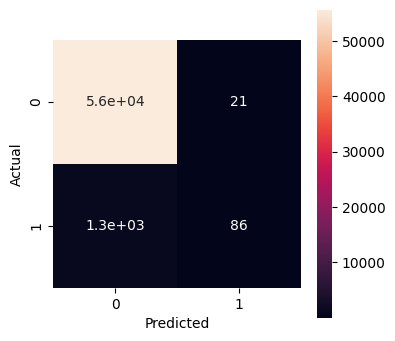

In [66]:
#confusion matrix (heatmap)
# write our code here:
fig, ax = plt.subplots(1,1,figsize=(4,4))
ax = sns.heatmap(gnb_cm, annot=True, square=True)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual');

In [67]:
#classification report
# write our code here:
print(metrics.classification_report(y_test, 
                                    gnb_y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56855
           1       0.06      0.80      0.12       107

    accuracy                           0.98     56962
   macro avg       0.53      0.89      0.55     56962
weighted avg       1.00      0.98      0.99     56962



FPR : [0.         0.02203852 1.        ]
TPR : [0.         0.80373832 1.        ]


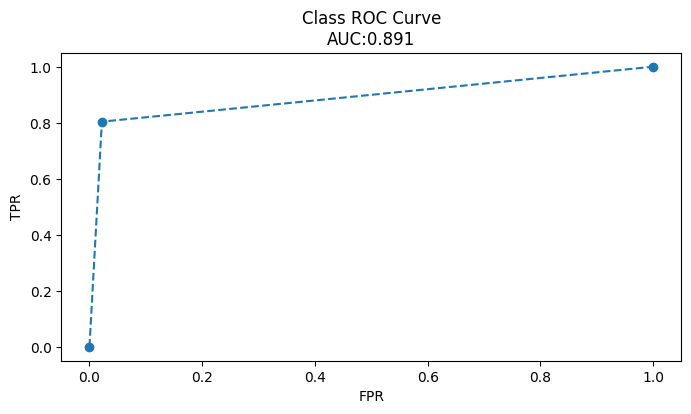

In [77]:
#ROC curve
# write our code here:
fpr, tpr, thresholds = metrics.roc_curve(y_test, gnb_y_pred)
auc = metrics.auc(fpr, tpr)
print("FPR : {}".format(fpr), 
      "TPR : {}".format(tpr), sep='\n')
fig, ax = plt.subplots(figsize=(8,4))
ax.plot(fpr, tpr, 'o--')
ax.set_title("Class ROC Curve\nAUC:{:.3f}".format(auc))
ax.set_xlabel("FPR") 
ax.set_ylabel("TPR");

In [ ]:
#(b)
#The results all seem to agree that our Gaussian Naive Bayes model is well-trained to this dataset.
#By looking at the confusion matrix, we see that the model correctly predicted incidences of non-fraud
#55,602 times and only incorrectly predicted incidences of non-fraud 1254 times. Conversely, the model 
#correctly predicted incidences of fraud 86 times nand only incorrectly predicted incidences of fraud 21 times.
#From this, it seems that the data does far better in predicting incidences of non-fraud than fraud. This is 
#supported by the classification report which shows that the precision, recall, and f1-score for non-fraud were 
#all much higher than those for fraud. The ROC curve also supports the strength of this model, with an AUC of 
#0.891 which is quite high.